In [ ]:
import pandas
import numpy
from n2lite import n2lite
import matplotlib.pyplot as plt

In [28]:
path_HOT = '/home/amigos/data/sql/nasco_20181101_122955.db'
path_COLD = '/home/amigos/data/sql/nasco_20181101_123044.db'

In [29]:
D_HOT = n2lite.N2lite(path_HOT)
D_COLD = n2lite.N2lite(path_COLD)
d_HOT = D_HOT.read_pandas_all()
d_COLD = D_COLD.read_pandas_all()

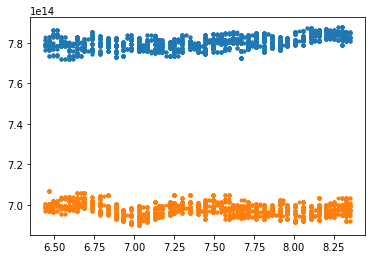

In [30]:
beam = '5l'
plt.plot(d_HOT['sis_vol_'+beam],d_HOT['xffts_1'],'.')
plt.plot(d_COLD['sis_vol_'+beam],d_COLD['xffts_1'],'.')

In [31]:
#groupby関数の定義
bins = numpy.arange(6.95,9.1,0.1)

def func(x):
    if x < bins[0]:return-1
    for i in range(len(bins)-1):
        if x >= bins[i] and x < bins[i+1]:return i
        continue
    return len(bins)

In [32]:
d_HOT['x'] = d_HOT['sis_vol_'+beam].apply(func)
d_COLD['x'] = d_COLD['sis_vol_'+beam].apply(func)
d2_HOT_groupby = d_HOT.groupby('x')
d2_COLD_groupby = d_COLD.groupby('x')
vol_HOT_mean =d2_HOT_groupby.mean()
vol_COLD_mean =d2_COLD_groupby.mean()

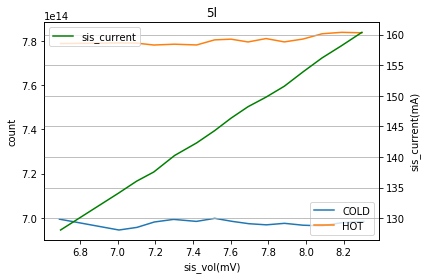

In [33]:
#　HOT/COLD 生データ

fig, ax1 = plt.subplots()
ax1.plot(vol_COLD_mean['sis_vol_'+beam],vol_COLD_mean['xffts_1'], label='COLD')
ax1.plot(vol_HOT_mean['sis_vol_'+beam],vol_HOT_mean['xffts_1'],label='HOT')
ax2 = ax1.twinx()
ax2.plot(vol_HOT_mean['sis_vol_'+beam],vol_HOT_mean['sis_cur_'+beam] , c='green', label='sis_current')
ax2.plot()
plt.grid()
ax1.legend(loc=4)
ax2.legend()
ax1.set_xlabel('sis_vol(mV)')
ax1.set_ylabel('count')
ax2.set_ylabel('sis_current(mA)')
ax1.set_title(beam)
plt.show()

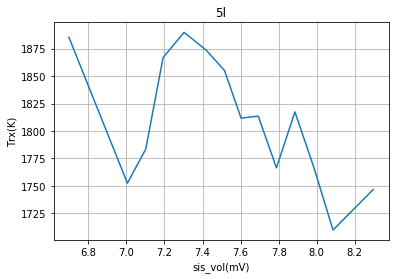

In [34]:
# Trx - sis_voltage 曲線　

Y = vol_HOT_mean['xffts_1']/vol_COLD_mean['xffts_1']
Trx = (300-Y*77)/(Y-1)
vol_HOT_mean = vol_HOT_mean.rename(columns = {'xffts_1':'count'})
T= pandas.concat([vol_HOT_mean,Trx],axis = 1)
T = T.rename(columns = {'xffts_1':'Trx'})

plt.plot(vol_HOT_mean['sis_vol_'+beam],Trx)
#plt.ylim(0,200)
plt.grid()
plt.xlabel('sis_vol(mV)')
plt.ylabel('Trx(K)')
plt.title(beam)

In [35]:
#最適パラメータ　
t= T.loc[T['Trx'].idxmin()]
print('最適パラメータ')
print('Trx    :',t['Trx'].min(),'(K)')
print('sis_cur:',t['sis_cur_'+beam],'(mA)')
print('sis_vol:',t['sis_vol_'+beam],'(mV)')
print('loatt_current:',t['loatt_'+beam],'(mA)')

最適パラメータ
Trx    : 1709.662633905335 (K)
sis_cur: 156.19604627071823 (mA)
sis_vol: 8.085236101519337 (mV)
loatt_current: 10.0 (mA)


In [ ]:
3387/15  ## fixtime = 3sec